<a href="https://colab.research.google.com/github/sebaszx/Tarea2CienciasDeLosDatosModulo3/blob/main/Tarea2_EstadisticaParaCienciaDeLosDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística para Ciencia de los Datos
# Tarea #2
En esta asignación se busca que los estudiantes exploren un conjunto de datos y determinen qué distribución modela más efectivamente cada columna. En particular, se sugiere que los estudiantes utilicen el conjunto de datos provisto, pero queda abierto a la decisión de los estudiantes usar otros sets de datos.

Deberán tomar en cuenta todas las distribuciones vistas en clase pero no deben limitarse a ellas. Se espera que haya un uso significativo de bibliotecas como `matplotlib` para mostrar visualmente la comparación entre los datos y las distribuciones propuestas.

Los estudiantes deberán entregar a más tardar el día 17 de julio a las 10:00PM un notebook de colab con la solución a los siguientes ejercicios:




 





Estudiante: Sebastián Porras

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon,norm,geom,poisson,binom,gamma
import numpy as np
import torch
from torch.distributions import Exponential
from torch.distributions import Geometric
from torch.distributions import Normal
from torch.distributions import Gamma
torch.set_printoptions(precision=2,sci_mode=False)
import math
from scipy.stats import ksone

In [117]:
df= pd.read_csv("https://raw.githubusercontent.com/sebaszx/Tarea2CienciasDeLosDatosModulo3/main/datasetTarea2.csv")

In [118]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,unknownCol
0,0.32,Premium,J,VS2,61.9,58.0,504,4.38,4.35,2.70,5.1
1,1.50,Good,F,SI2,62.9,59.0,7727,7.19,7.32,4.56,4.9
2,0.38,Ideal,H,VS1,61.7,55.0,955,4.65,4.70,2.89,4.7
3,0.53,Ideal,F,VVS1,62.1,53.2,2273,5.17,5.21,3.22,4.6
4,0.55,Ideal,D,VS2,60.6,56.0,2224,5.30,5.36,3.23,5.0


In [119]:
df.isnull().sum(axis = 0)

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
unknownCol    0
dtype: int64

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,200.0,0.788450,0.492473,0.240000,0.4075,0.70,1.020000,2.530000
depth,200.0,61.788000,1.424959,56.900000,61.0000,61.80,62.600000,67.100000
table,200.0,57.298500,2.280978,53.000000,56.0000,57.00,58.250000,64.000000
price,200.0,3751.065000,3884.761126,394.000000,962.5000,2354.50,4790.250000,17103.000000
x,200.0,5.703450,1.122998,4.040000,4.7350,5.64,6.465000,8.540000
y,200.0,5.711200,1.117658,4.060000,4.7600,5.68,6.455000,8.480000
z,200.0,3.524900,0.693152,2.410000,2.8975,3.48,4.010000,5.400000
unknownCol,200.0,5.929425,0.857031,3.997159,5.2000,5.90,6.512438,8.462215


In [121]:
# df=df[["carat","depth","price","table"]]

# df = (df-df.min())/(df.max()-df.min())

#1.
 Elija alguna variable **cuantitativa** del set de datos y: 
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)
  - Brinde al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica con `matplotlib` (10 puntos)
  - Proporcione una explicación detallada de qué valores y distribuciones se probaron en el proceso y por qué se hizo la escogencia. (3 puntos)

![dist](https://github.com/sebaszx/Tarea2CienciasDeLosDatosModulo3/blob/main/Distribuciones.png?raw=true)

In [122]:
carat=df["carat"]
depth=df["depth"]
price=df["price"]
x_column=df["x"]
unknown= df['unknownCol']

##Carat

In [123]:
def ShowHistogram(Data,bins,Log):
  plt.hist(Data, bins, log=Log,density=True)
  


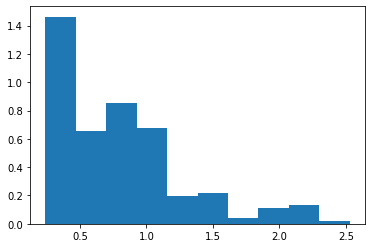

In [124]:
hist=ShowHistogram(carat,10,False)


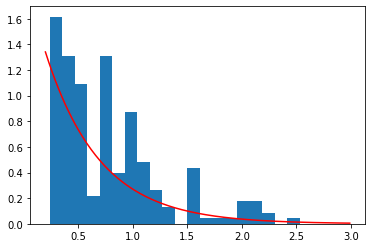

In [125]:
def Exponential(lambdaVal):
  lambdaValue = lambdaVal
  exponencial1 = expon(scale=1/lambdaValue)

  x1= np.arange(0.2,3,.01)
  fp1 = exponencial1.pdf(x1) # Función de Probabilidad
  return x1,fp1

ShowHistogram(carat,20,False)
x,fp=Exponential(2)
plt.plot(x, fp, color="red", label="lambda=2")

Se utilizo la distribución Exponencial ya que el histograma parece tener la misma tendencia que esta distribución y además que el peso se considera una VA continua. El parametro $\lambda$ que utilicé es 2




#2.
 Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 2 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)

##Depth

In [141]:
depth.head()

0    61.9
1    62.9
2    61.7
3    62.1
4    60.6
Name: depth, dtype: float64

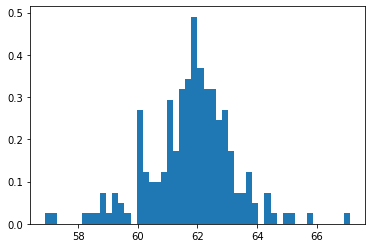

In [127]:
ShowHistogram(depth,50,False)

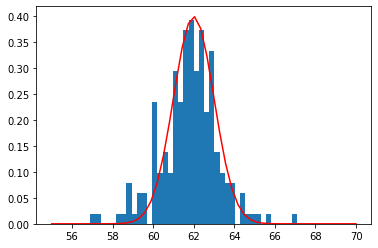

In [128]:
def normal(mu,sigma):
  x = np.linspace(55, 70)
  fp=norm.pdf(x, mu, sigma)
  return x,fp
  
x,fp=normal(62,1)
plt.plot(x,fp,color="red")
ShowHistogram(depth,40,False)
plt.show()

Para la columna "depth" se decidió modelarla con una función de distribución normal. Podemos ver que la media está entre 60 y 64, por eso mismo se escogió $\mu$ =62 y con $\sigma$ = 1

##Price

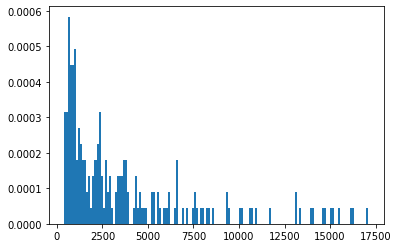

In [129]:
ShowHistogram(price,150,False)

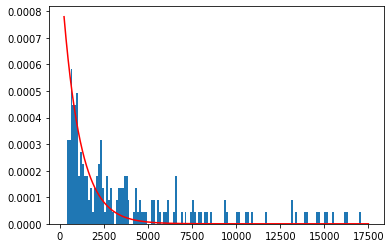

In [130]:
def geometric(prob):
  p = prob
  x = np.arange(250,17500)
  fp=geom.pmf(x, p)
  return x,fp

  
x,fp=geometric(0.001)

plt.plot(x,fp, label='geom pmf',color="red")
ShowHistogram(price,150,False)

plt.show()
#plt.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

Se utilizo la distribución Geométrica ya que el histograma parece tener la misma tendencia que esta distribución y además que el precio se considera una VA discreta. El parametro p utilizado para acercarnos lo más posible a esta distribución fue de 0.001



##X

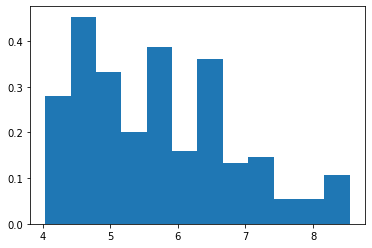

In [131]:
ShowHistogram(x_column,12,False)

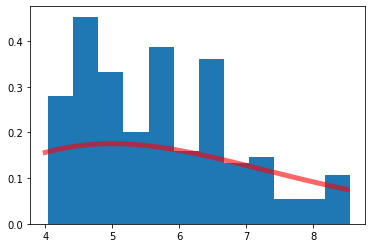

In [132]:
def gammadist(a):  
  a = a
  mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
  x = np.linspace(4,8.5)
  fp=gamma.pdf(x, a)
  return x,fp
x,fp=gammadist(6)
plt.plot(x, fp,
       'r-', lw=5, alpha=0.6, label='gamma pdf')
ShowHistogram(x_column,12,False)
plt.show()

En este caso como X es una variable continua se decidió usar la distribución gamma. La distribución gamma tiene la forma más aglomerada hacia la izquierda, mientras que a la derecha hay menos datos
se utilizó a=6

#3. 
Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución
 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta

El valor $D$ obtenido es probado con una confianza de $1-\alpha = 0.95$, entonces utilizando la tabla de la distribución Kolgomorov.Si $D$ es mayor que el valor crítico, 
**la hipótesis nula $H_0$ se rechaza**, de lo contrario se acepta (se supone como cierta).

El valor critico para esta prueba es de $0.0951$ que calculamos de la siguiente manera
$\frac{1.35810}{\sqrt{200}}$


In [139]:
def hist(data):
  dic={}
  #print(data)
  for value in data:
    #print(value)
    value=round(value, 2)
    if value not in dic:
        dic[value] = 1
    else:
        dic[value] += 1
  return dic.keys(),dic.values()
#keys,values=hist(carat)


def ks(datos,dist):
  val,ocurrences=np.unique(datos,return_counts=True)
  
  #Ocurrences
  histogram = torch.tensor(ocurrences)
  #values
  histogramX = torch.tensor(val)

  #number of observations
  n = histogram.sum()
  histogramNorm = histogram / n        #Norm factor for mean
  #print(histogramX * histogramNorm)
  histogramNorm2 = histogram / (n - 1) #Norm factor for std
  meanHist = (histogramX * histogramNorm).sum()
  stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())
  #calculate cumulative sum
  cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)
  
  if dist=='Normal':
    # Density = Normal(meanHist, stdHist)
    # sorted, indices = torch.sort(histogramX)
    # cdfNormalIdeal = Density.cdf(sorted) #points used to evaluate cdf
    cdfNormalIdeal=torch.from_numpy(np.sort(norm.cdf(histogramX,loc=meanHist,scale=stdHist)))
  elif dist=='Geometric':
    cdfNormalIdeal=torch.from_numpy(np.sort(geom.cdf(histogramX,p=0.001)))
  elif dist=='Exponential':
    cdfNormalIdeal=torch.from_numpy(np.sort(expon.cdf(histogramX,scale=1/2)))
  elif dist=='Gamma':
    cdfNormalIdeal=torch.from_numpy(np.sort(gamma.cdf(histogramX,a=6)))

  #Compare the empirical and ideal distributions
  difference = torch.abs(cdfNormalIdeal - cdfEmpirical)
  #print(difference)
  dn = torch.max(difference)
  plt.plot(cdfEmpirical, label='cdf Empirical', linewidth=2)
  plt.plot(cdfNormalIdeal, label='cdf Dist Ideal', linewidth=2)
  plt.legend(loc='best')
  plt.show()
  print(1.3581 / np.sqrt(n),'valor critico') #valor critico
  return dn



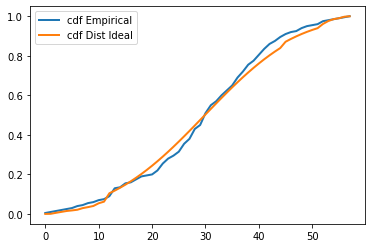

tensor(0.10, dtype=torch.float64) valor critico
tensor(0.06, dtype=torch.float64) 0.09515799837695846
Se acepta


In [140]:

dn_normal=ks(depth,'Normal')
tablescore=ksone.ppf(0.975,200)
print(dn_normal,tablescore)
if dn_normal>tablescore:
  print('Se rechaza')
else:
  print('Se acepta')

Podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.06 > 0.0951$.
Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{x}$ ha sido generado de una distribución normal, se  acepta.

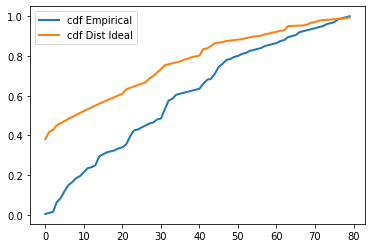

tensor(0.10, dtype=torch.float64) valor critico
tensor(0.41, dtype=torch.float64) 0.09515799837695846
Se rechaza


In [135]:
dn=ks(carat,'Exponential')
tablescore=ksone.ppf(0.975,200)
print(dn,tablescore)
if dn>tablescore:
  print('Se rechaza')
else:
  print('Se acepta')

Podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.41 > 0.0951$.
Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{x}$ ha sido generado de una distribución Exponencial, se  rechaza.

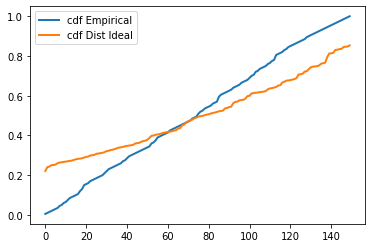

tensor(0.10, dtype=torch.float64) valor critico
tensor(0.23, dtype=torch.float64) 0.09515799837695846
Se rechaza


In [136]:
dn=ks(x_column,'Gamma')
tablescore=ksone.ppf(0.975,200)
print(dn,tablescore)
if dn>tablescore:
  print('Se rechaza')
else:
  print('Se acepta')

Podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.23 > 0.0951$.
Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{x}$ ha sido generado de una distribución Gamma, se  rechaza.

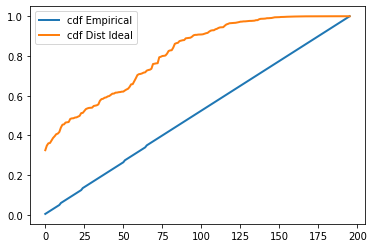

tensor(0.10, dtype=torch.float64) valor critico
tensor(0.42, dtype=torch.float64) 0.09515799837695846
Se rechaza


In [137]:
dn=ks(price,'Geometric')
tablescore=ksone.ppf(0.975,200)
print(dn,tablescore)
if dn>tablescore:
  print('Se rechaza')
else:
  print('Se acepta')

Podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.42 > 0.0951$.
Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{x}$ ha sido generado de una distribución Geometrica, se  rechaza.

In [138]:
# from scipy import stats
# stats.kstest(depth, stats.norm.cdf)